## Dataset Metadata

| Column                         | Description                                                                                                                   | Dtype    |
|--------------------------------|-------------------------------------------------------------------------------------------------------------------------------|----------|
| Gender                         | Laki-laki atau Wanita                                                                                                         | object   |
| Age                            | Usia seseorang dalam tahun                                                                                                    | int64    |
| Height                         | Tinggi dalam meter                                                                                                            | float64  |
| Weight                         | Berat dalam kilogram                                                                                                          | float64  |
| family_history_with_overweight | Apakah orang tersebut memiliki riwayat keluarga dengan kelebihan berat badan                                                  | object   |
| FAVC                           | Jika orang tersebut sering mengonsumsi makanan berkalori tinggi (ya/tidak)                                                   | object   |
| FCVC                           | Frekuensi konsumsi sayuran (skala dari 1 hingga 3)                                                                            | float64  |
| NCP                            | Jumlah makanan utama per hari                                                                                                 | float64  |
| CAEC                           | Frekuensi mengonsumsi makanan di antara waktu makan (Tidak pernah, Kadang-kadang, Sering, Selalu)                            | object   |
| SMOKE                          | Apakah orang tersebut merokok (ya/tidak)                                                                                      | object   |
| CH2O                           | Asupan air harian (skala dari 1 hingga 3)                                                                                     | float64  |
| SCC                            | Jika orang tersebut memantau asupan kalori mereka (ya/tidak)                                                                  | object   |
| FAF                            | Frekuensi aktivitas fisik (skala dari 0 hingga 3)                                                                             | float64  |
| TUE                            | Waktu yang dihabiskan untuk menggunakan teknologi (skala dari 0 hingga 3)                                                     | float64  |
| CALC                           | Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu)                                                      | object   |
| MTRANS                         | Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki)                                         | object   |
| NObeyesedad                    | Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I/II/III)       | object   |


## Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('ObesityDataSet1.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44 years,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight


In [3]:
df.shape

(1055, 17)

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   object 
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   object 
 9   SMOKE                           1055 non-null   object 
 10  CH2O                            1055 non-null   float64
 11  SCC                             1055 non-null   object 
 12  FAF                             10

Cleaning data pada kolom age

In [5]:
df['Age'] = df['Age'].str.replace(' years', '').astype(int)

In [6]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

Plot Categorical column

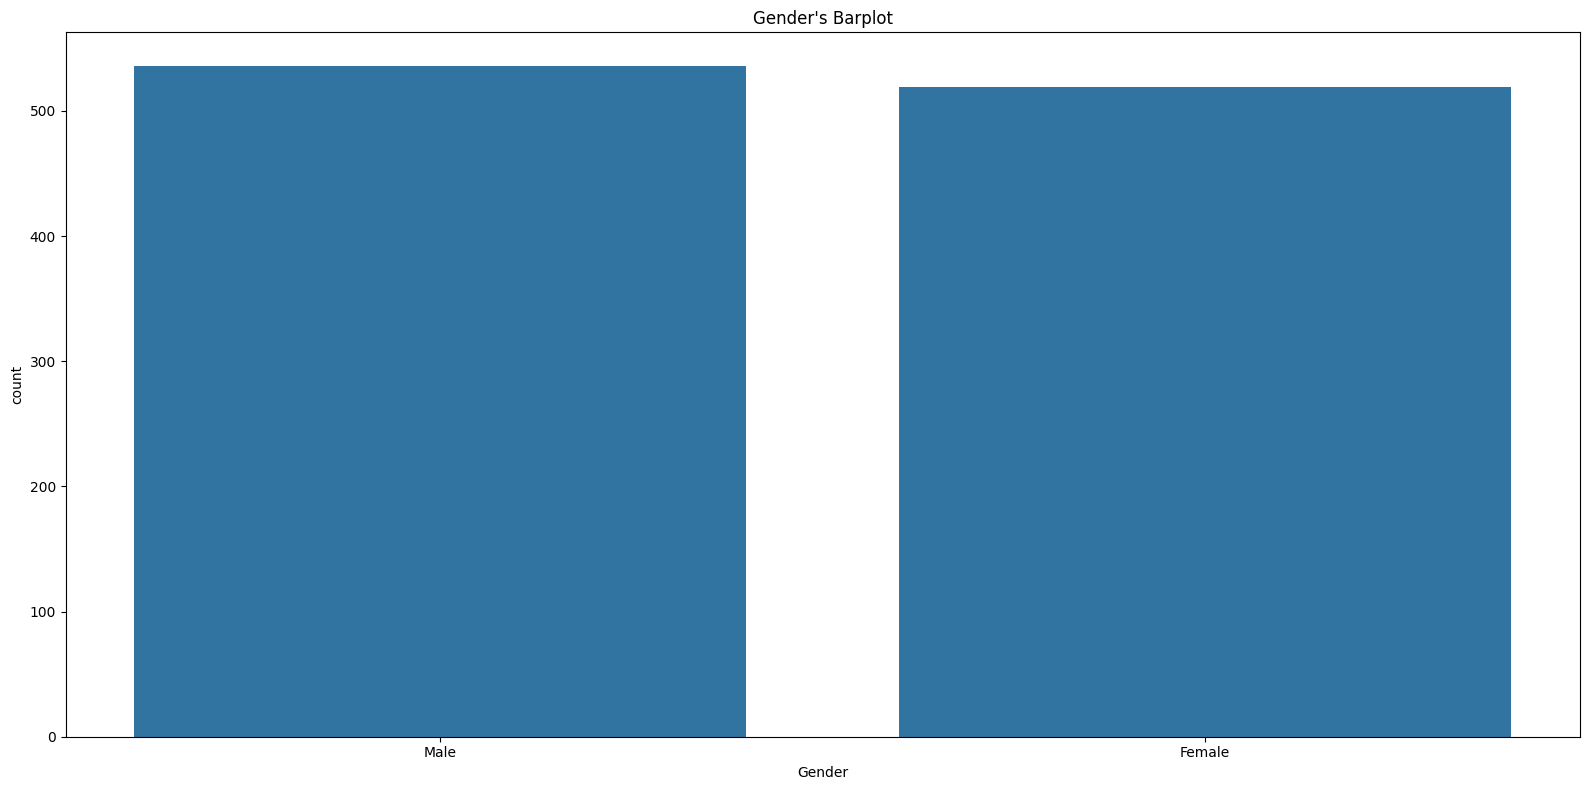

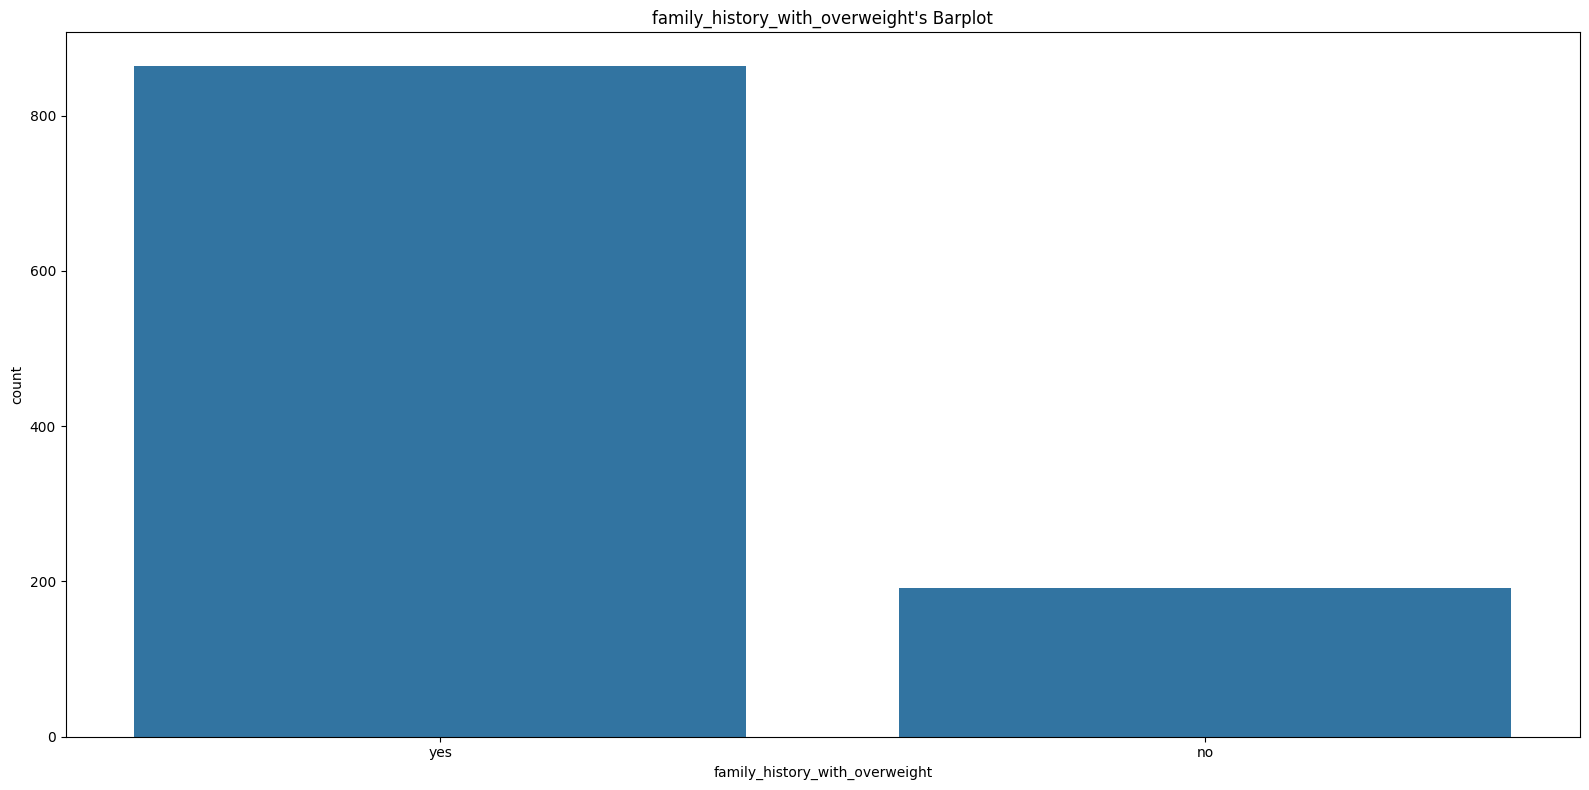

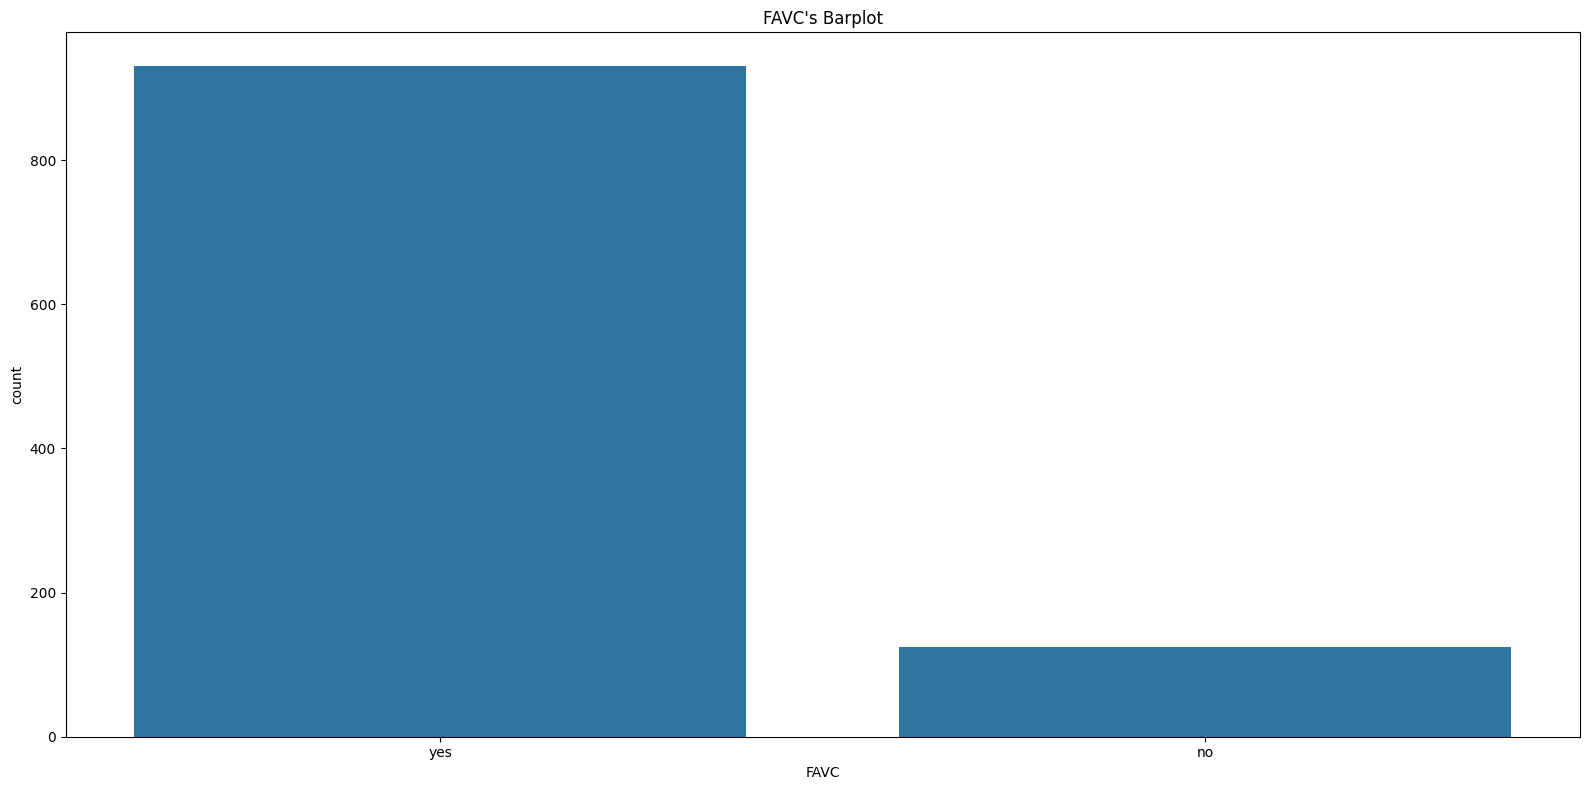

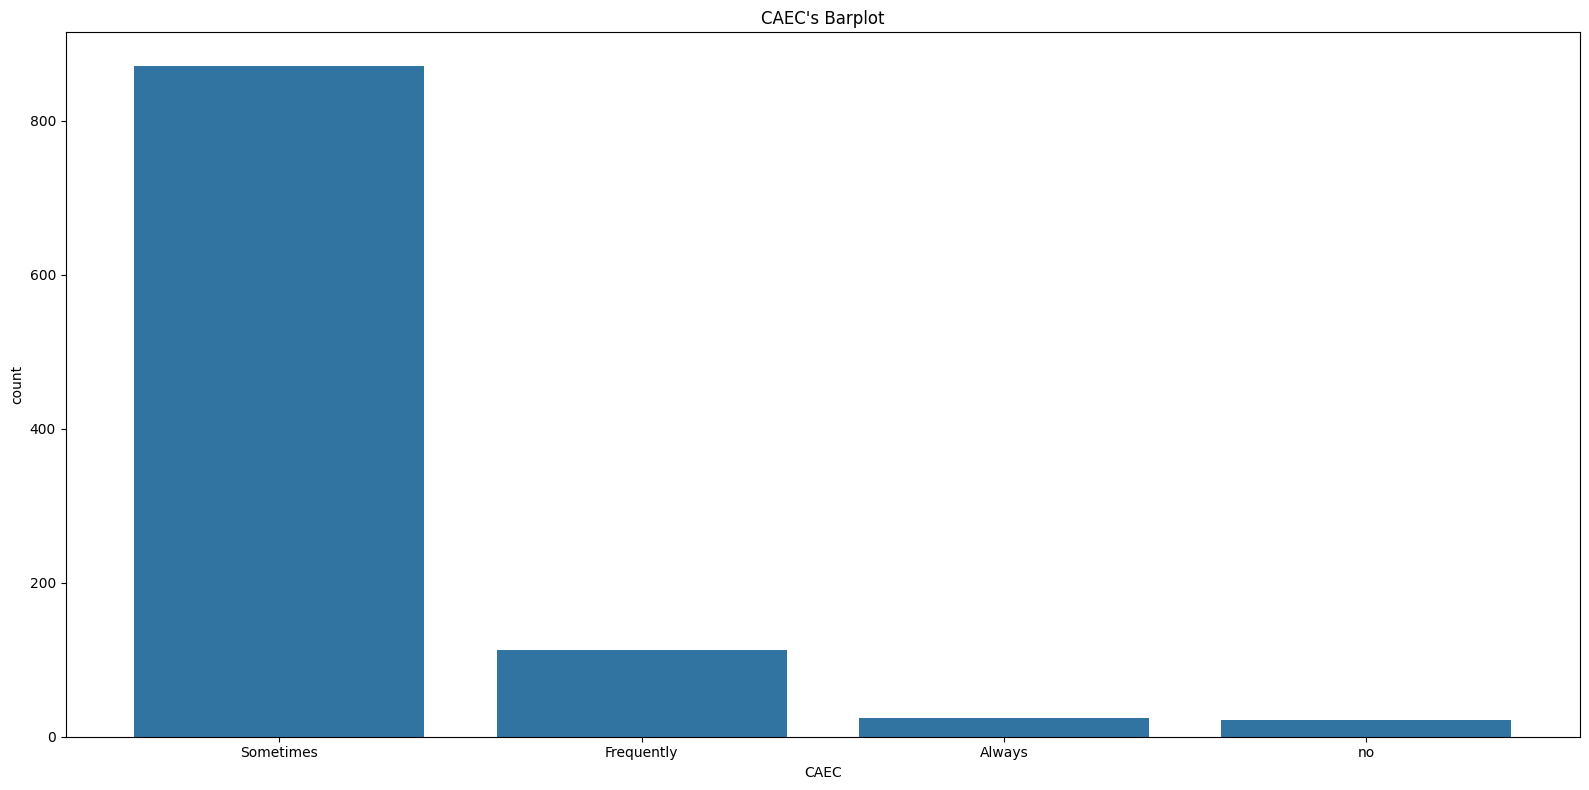

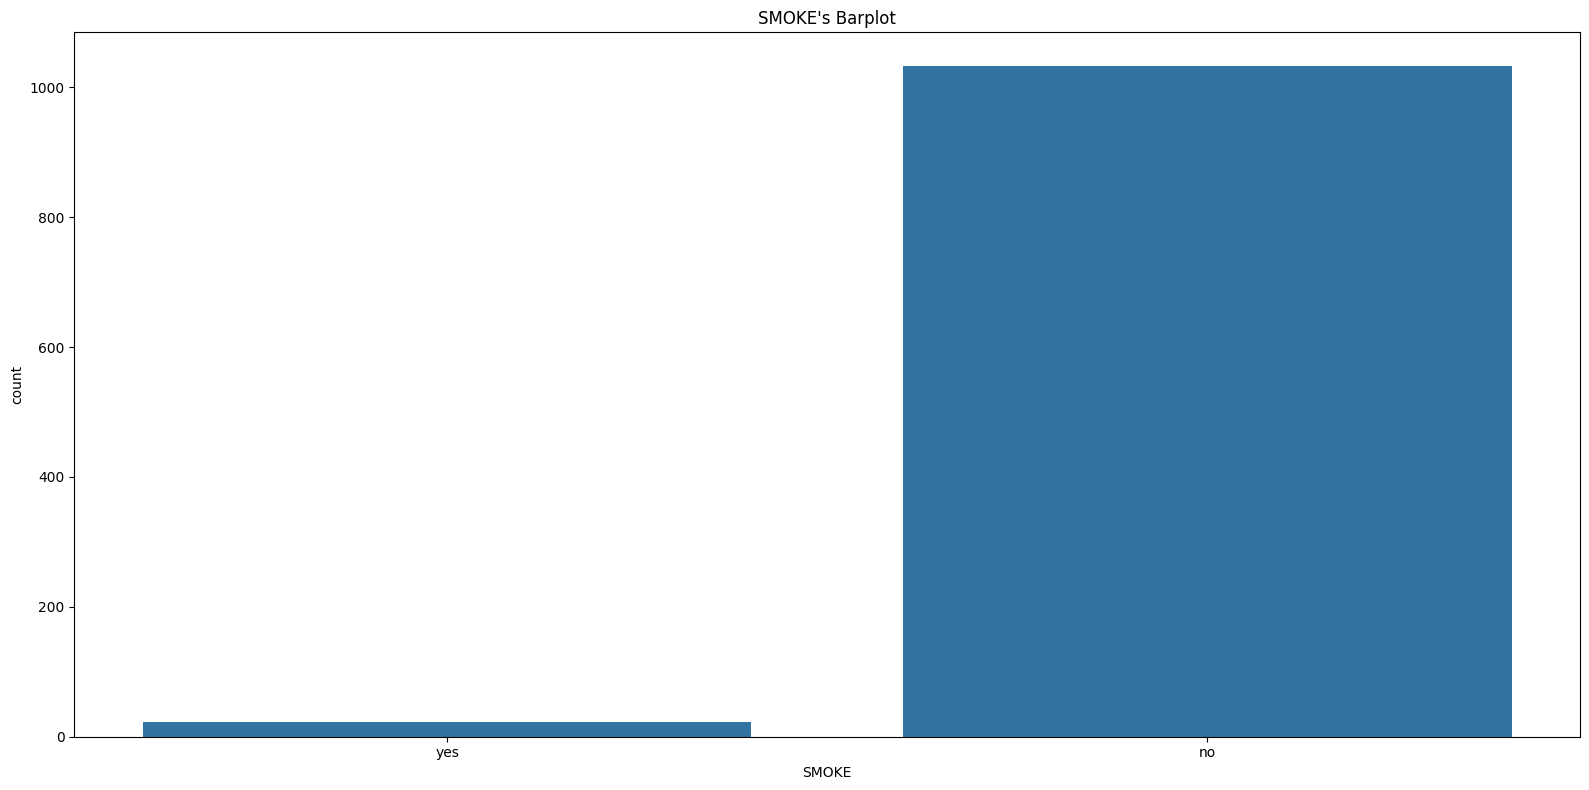

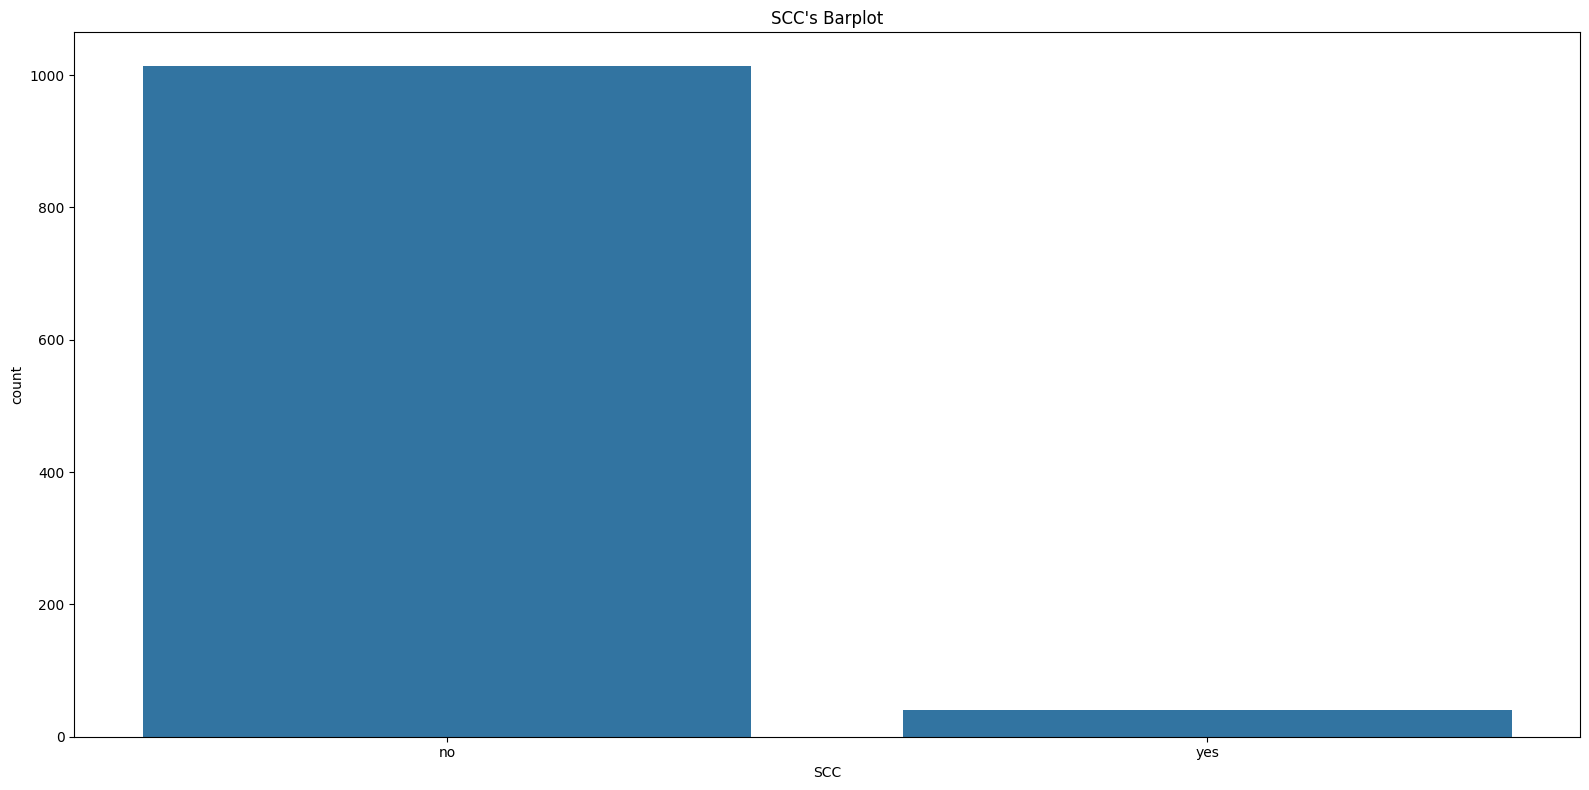

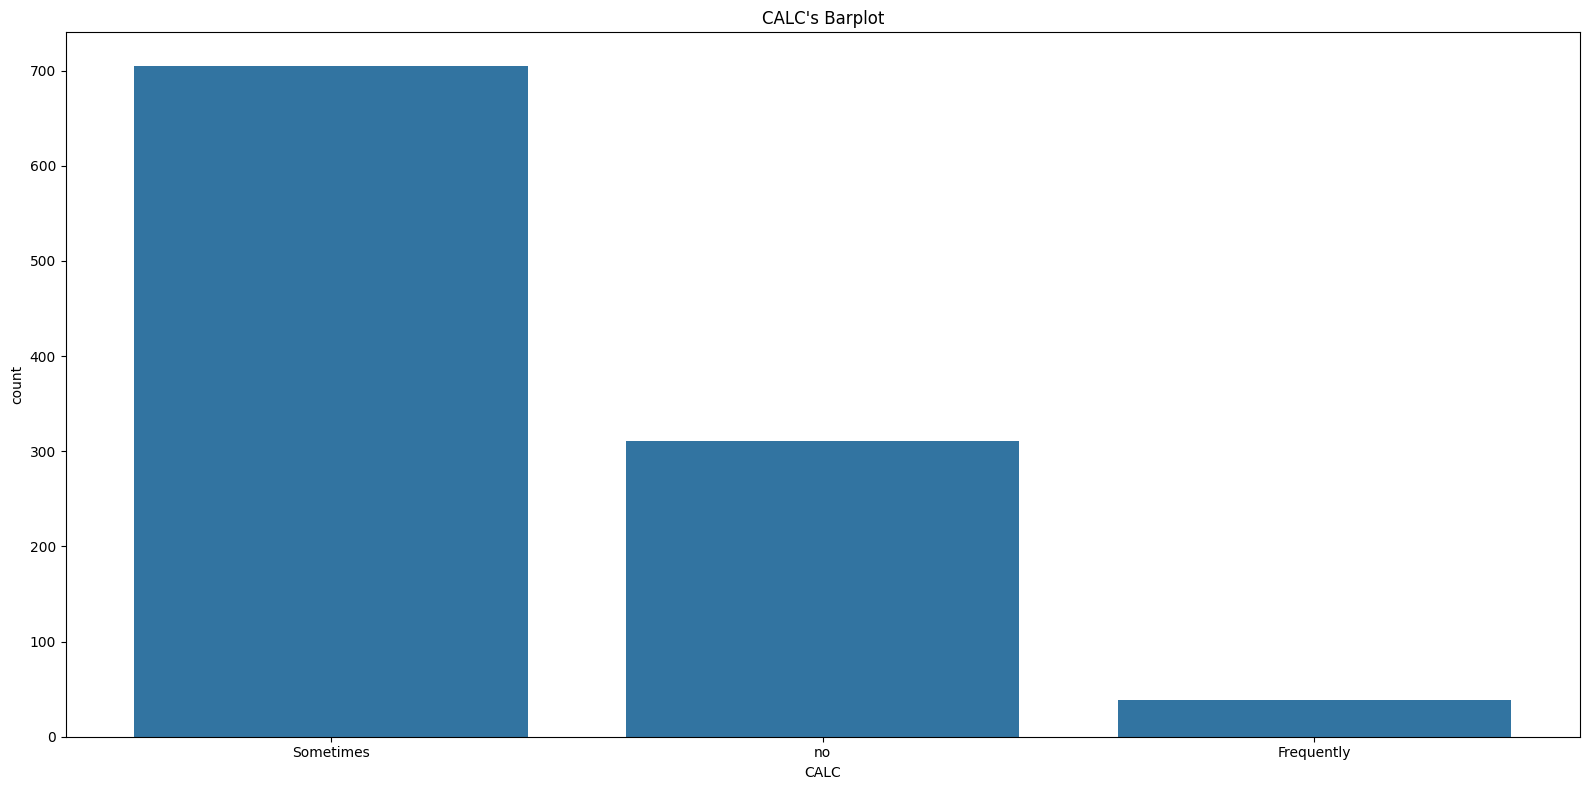

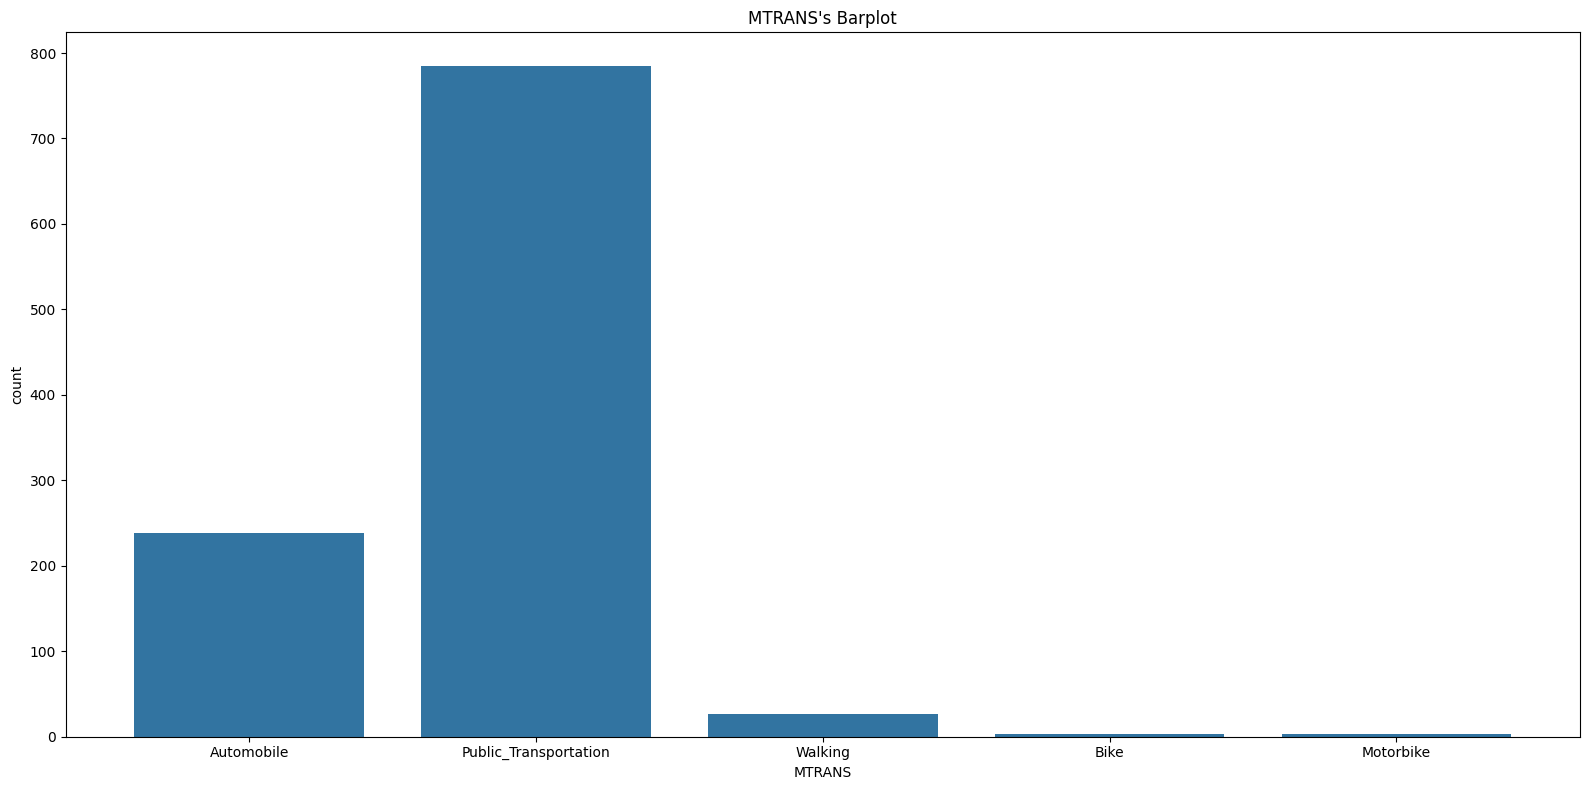

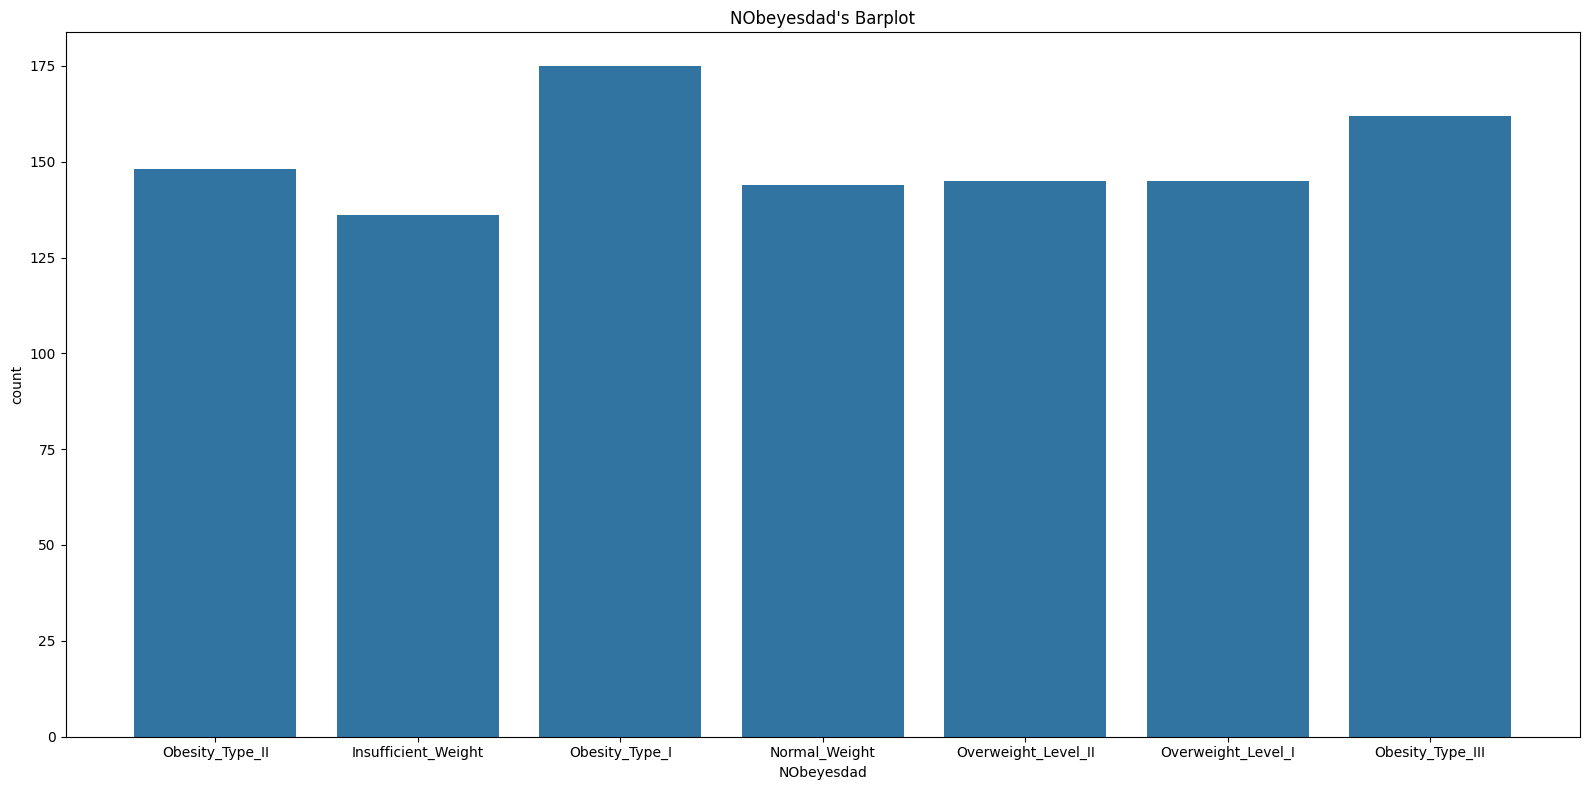

In [7]:
def plot_cat(df, cat_col):
    """
    Plotting bar chart untuk setiap kolom kategorikal
    Menggunakan sns.countplot untuk menghitung total data per kategori
    Set title dan label
    
    Args:
        df: DataFrame
        cat_col: List of categorical columns
    """
    
    for col in cat_col:
        fig, ax = plt.subplots(figsize=(16,8))
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f'{col}\'s Barplot')
        plt.tight_layout()
        plt.plot()

        
plot_cat(df, cat_col)

Plot Numerical column

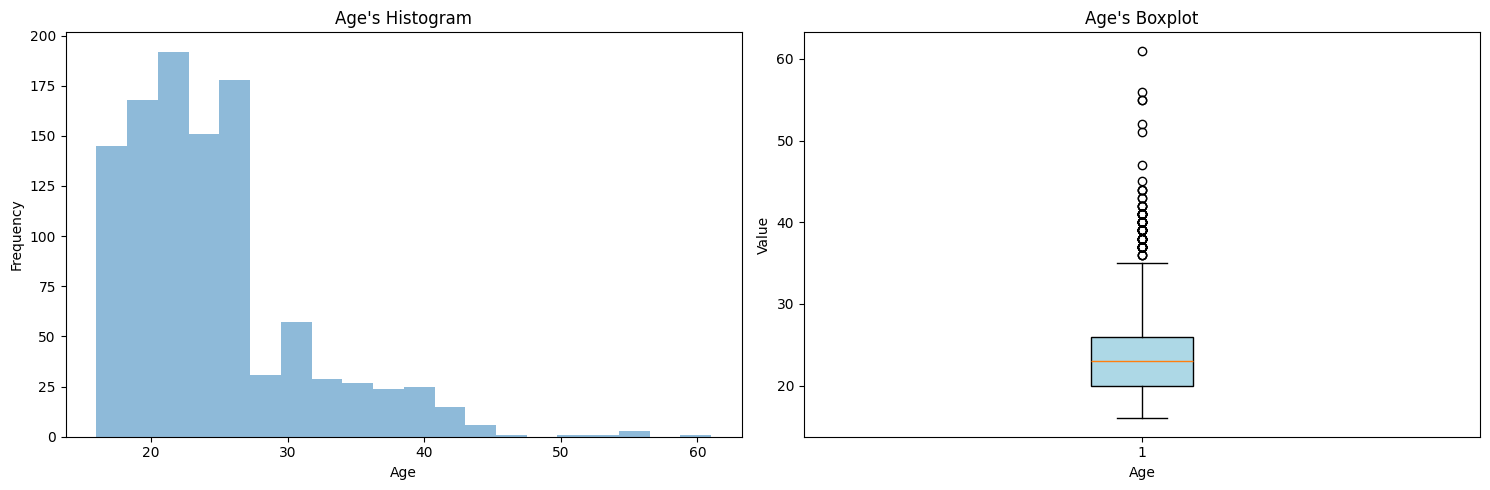

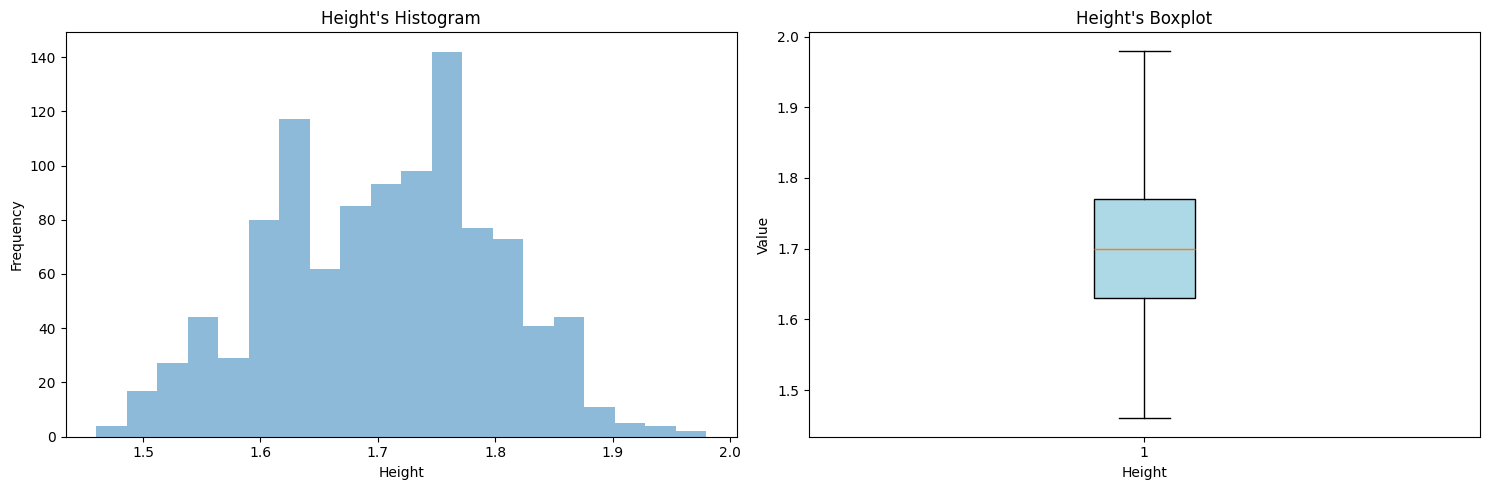

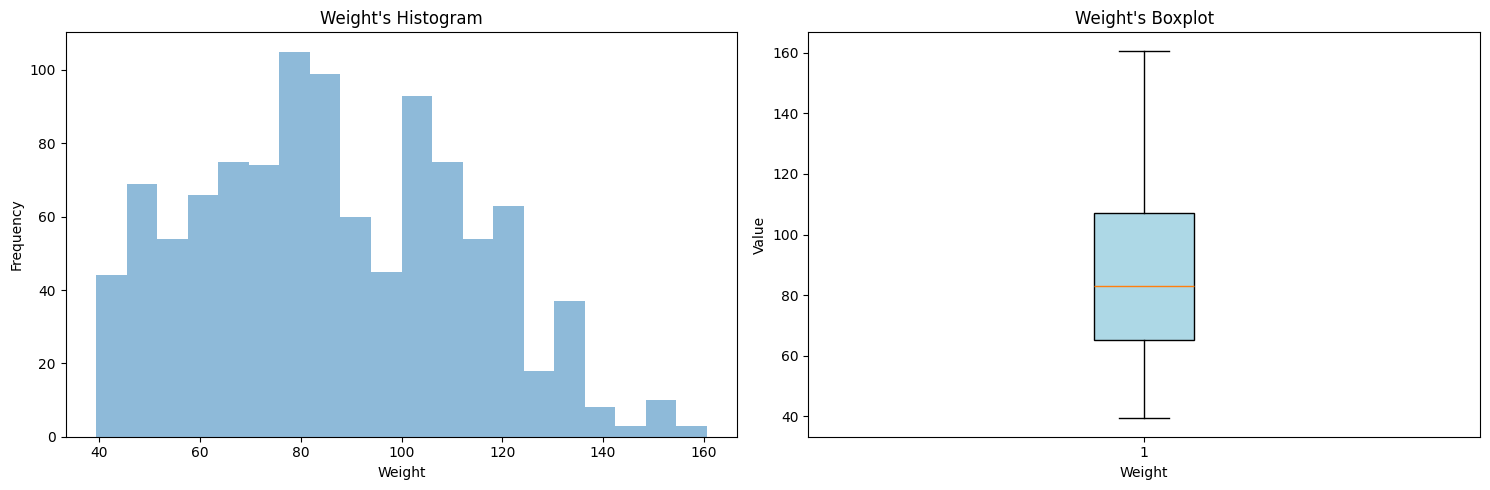

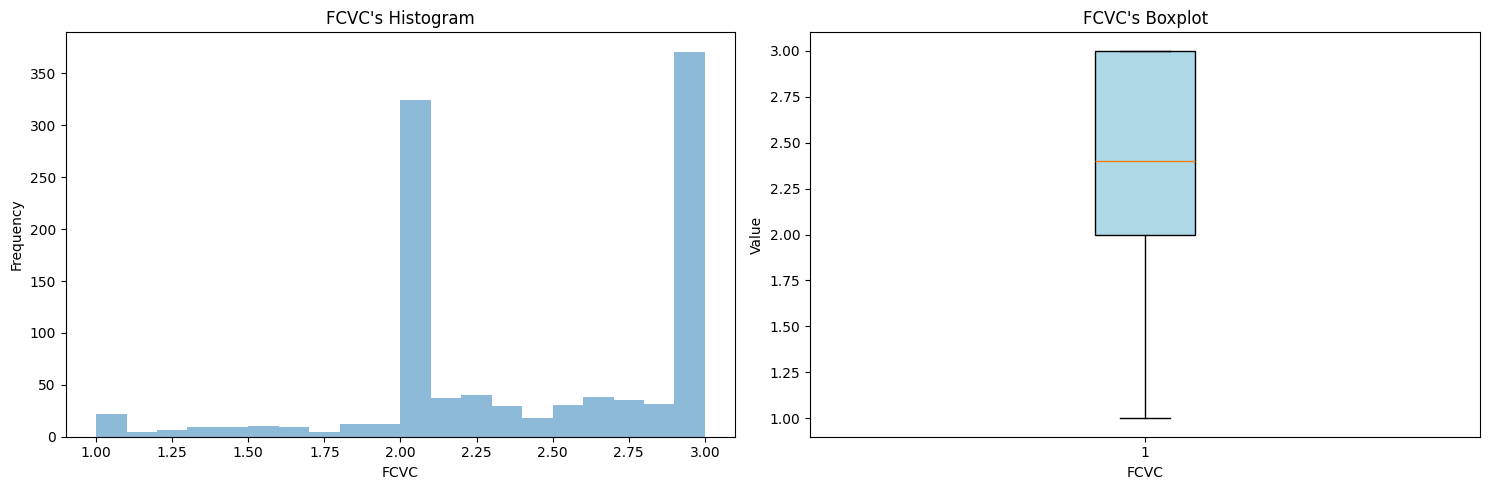

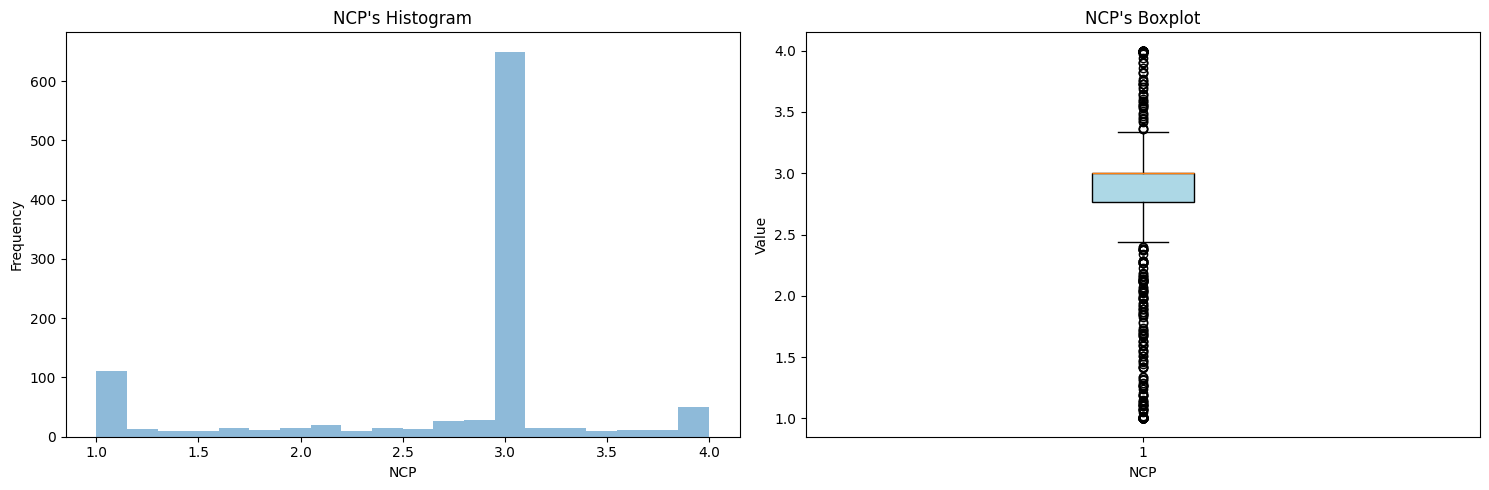

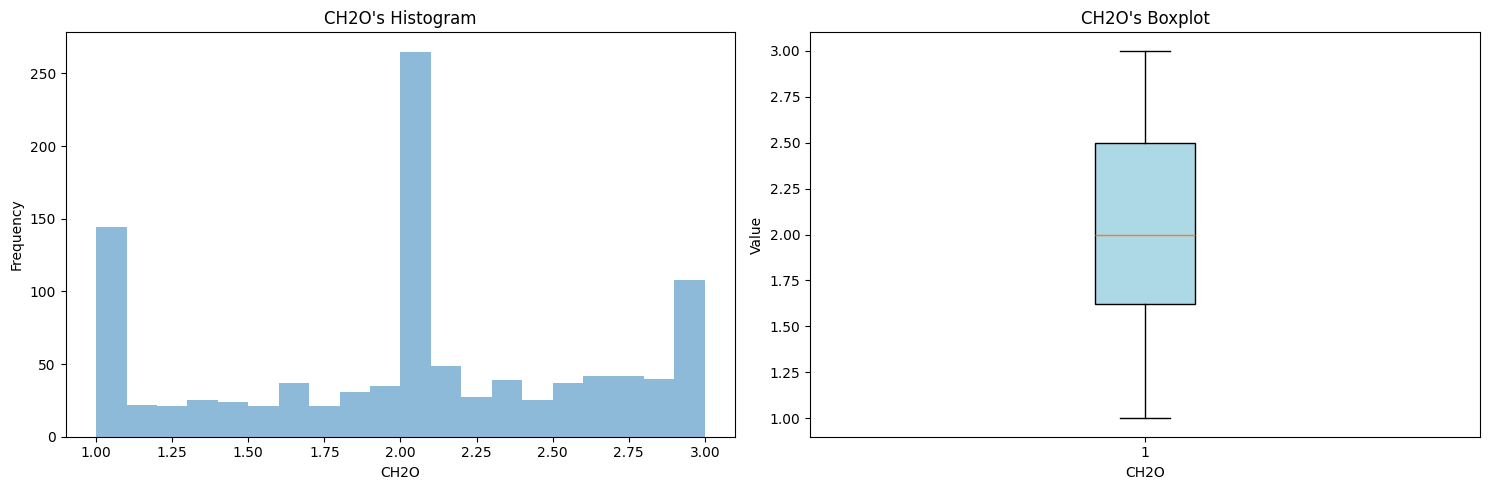

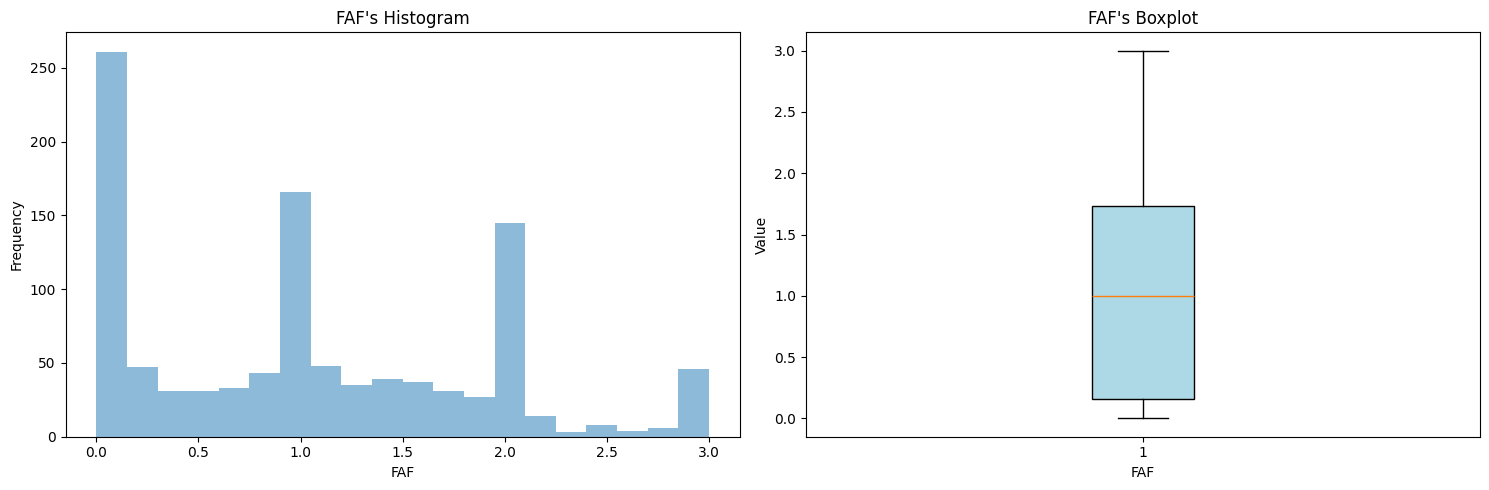

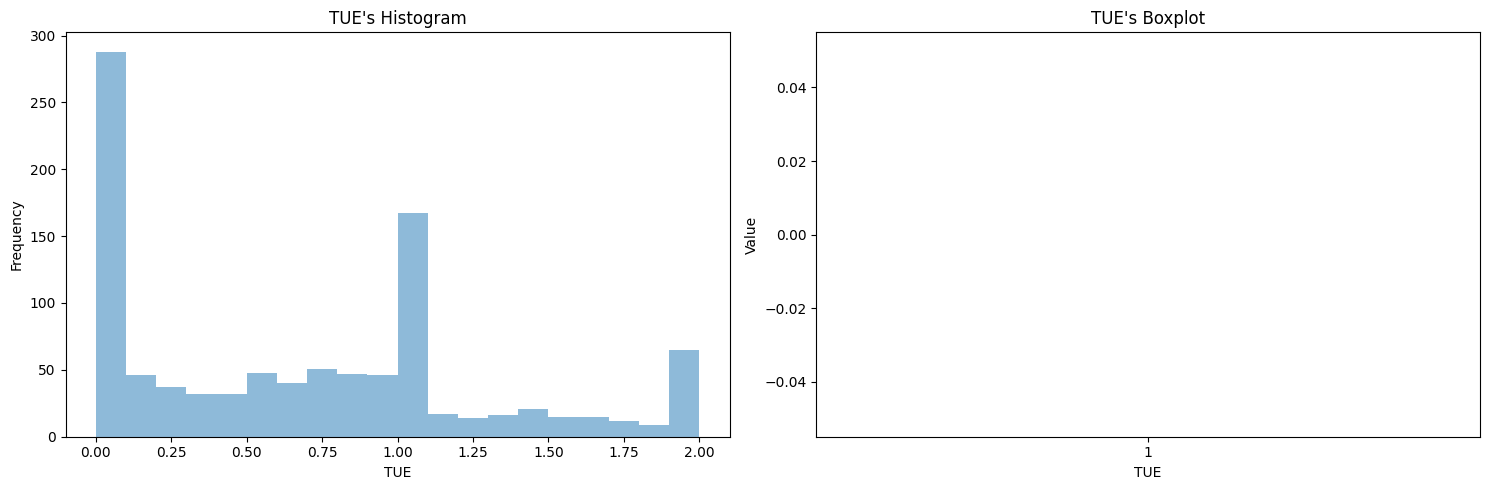

In [8]:
def plot_num(df, num_col):
    """
    Plotting histogram dan barchart untuk setiap kolom numerik
    Menggunakan matplotlib untuk plotting hist dan boxplot
    Set title dan label
    
    Args:
        df: DataFrame
        num_col: numerical columns
    """
    for col in num_col:
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        ax[0].hist(df[col], bins = 20, alpha = 0.5)
        ax[0].set_title(f"{col}\'s Histogram")
        ax[0].set_xlabel(col)
        ax[0].set_ylabel("Frequency")
        
        
        ax[1].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
        ax[1].set_title(f"{col}\'s Boxplot")
        ax[1].set_xlabel(col)
        ax[1].set_ylabel("Value")
        
        plt.tight_layout()
        plt.show()
        
plot_num(df, num_col)

Cek penyebaran proporsi data setiap kolom

In [9]:
def check_proportion(df, cat_col):
    for col in cat_col:
        print(df[col].value_counts(normalize=True))
        print("--" * 20)
        print("\n")
        
check_proportion(df, cat_col)

Gender
Male      0.508057
Female    0.491943
Name: proportion, dtype: float64
----------------------------------------


family_history_with_overweight
yes    0.818957
no     0.181043
Name: proportion, dtype: float64
----------------------------------------


FAVC
yes    0.882464
no     0.117536
Name: proportion, dtype: float64
----------------------------------------


CAEC
Sometimes     0.846453
Frequently    0.108844
Always        0.023324
no            0.021380
Name: proportion, dtype: float64
----------------------------------------


SMOKE
no     0.979147
yes    0.020853
Name: proportion, dtype: float64
----------------------------------------


SCC
no     0.961137
yes    0.038863
Name: proportion, dtype: float64
----------------------------------------


CALC
Sometimes     0.668246
no            0.294787
Frequently    0.036967
Name: proportion, dtype: float64
----------------------------------------


MTRANS
Public_Transportation    0.744076
Automobile               0.225592
Wal

Untuk data null, kita akan isi dengan modus untuk kolom CAEC dan TUE

In [10]:
df['CAEC'] = df['CAEC'].fillna(df['CAEC'].mode()[0])
df['TUE'] = df['TUE'].fillna(df['TUE'].mode()[0])

## Data Preprocessing

In [11]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

Encode kolom target

In [12]:
target_encoder = LabelEncoder()
y_encode = target_encoder.fit_transform(y)

Splitting data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.2, random_state=42)

Untuk preprocessing fitur, beberapa teknik yang digunakan antara lain:
- Label encoding untuk 2 binary categorical
- Ordinal encoding, untuk data yang bersifat rentang waktu
- One hot encoding, untuk data > 2 kategory pada kolom

In [15]:
caec_order = ['no', 'Sometimes', 'Frequently', 'Always']
calc_order = ['no', 'Sometimes', 'Frequently']

ordinal_cols = ['CAEC', 'CALC']
onehot_cols = ['MTRANS']
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal_enc', OrdinalEncoder(categories=[caec_order, calc_order]), ordinal_cols),
        ('onehot_enc', OneHotEncoder(handle_unknown='ignore'), onehot_cols),
        ('onehot_binary', OneHotEncoder(drop='first', sparse_output=False), binary_cols),
    ],
    remainder='passthrough' 
)

preprocessor.fit(X_train)

c:\Users\asus\anaconda3\envs\MLOps\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_enc',
                                 OrdinalEncoder(categories=[['no', 'Sometimes',
                                                             'Frequently',
                                                             'Always'],
                                                            ['no', 'Sometimes',
                                                             'Frequently']]),
                                 ['CAEC', 'CALC']),
                                ('onehot_enc',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['MTRANS']),
                                ('onehot_binary',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'SMOKE', 'SCC'])])

In [16]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

## Modelling

Untuk modelling kita akan mencoba membandingkan `Random Forest` dan `XGBoost Classifier`, kedua model ini akan dituning secara random sebanyak 50 iterasi

In [17]:
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [18]:
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini','entropy','log_loss'],
    'max_features': ['sqrt', 'log2', None]
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'max_leaves': [2, 4, 6],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'gamma': [0, 1, 5],  
    'reg_alpha': [0, 0.5, 1],  
    'reg_lambda': [1, 1.5, 2], 
}

In [19]:
rf_search = RandomizedSearchCV(
    rf, rf_params, cv=3, n_iter=50,
    scoring='accuracy', n_jobs=-1, verbose=2, random_state=42
)

xgb_search = RandomizedSearchCV(
    xgb, xgb_params, cv=3, n_iter=50,
    scoring='accuracy', n_jobs=-1, verbose=2, random_state=42
)

In [20]:
rf_search.fit(X_train_transformed, y_train)
xgb_search.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\asus\anaconda3\envs\MLOps\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 1, 5],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_leaves': [2, 4, 6],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [1, 1.5, 2]},
                   random_state=42, scoring='accuracy', verbose=2)

## Evaluation

In [21]:
rf_best = rf_search.best_estimator_
xgb_best = xgb_search.best_estimator_

rf_pred = rf_best.predict(X_test_transformed)
xgb_pred = xgb_best.predict(X_test_transformed)

print("Best RF Params:", rf_search.best_params_)
print("Best XGB Params:", xgb_search.best_params_)

Best RF Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'criterion': 'log_loss'}
Best XGB Params: {'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_leaves': 6, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0}


Classification report

In [22]:
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("--" * 20)
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.93      0.84      0.88        31
           2       0.93      1.00      0.96        37
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00        25
           5       0.90      0.90      0.90        21
           6       0.94      0.94      0.94        36

    accuracy                           0.94       211
   macro avg       0.94      0.94      0.94       211
weighted avg       0.94      0.94      0.94       211

----------------------------------------
XGBoost Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.93      0.84      0.88        31
           2       0.88      0.95      0.91        37
           3       1.00      0.94      0.97        33
           4       1.00      0.96      0.98        

Cek akurasi dan overfitting

In [23]:
# Predict datatest
rf_pred = rf_best.predict(X_test_transformed)
xgb_pred = xgb_best.predict(X_test_transformed)

# Predict data train
rf_pred_train = rf_best.predict(X_train_transformed)
xgb_pred_train = xgb_best.predict(X_train_transformed)


# Akurasi data test
print("Random Forest test accuracy: ", accuracy_score(y_test, rf_pred))
print("XGBoost test accuracy: ", accuracy_score(y_test, xgb_pred))

print("\n")
print("==" * 20)
# Akurasi data train
print("Random Forest train accuracy: ", accuracy_score(y_train, rf_pred_train))
print("XGBoost train accuracy: ", accuracy_score(y_train, xgb_pred_train))

Random Forest test accuracy:  0.943127962085308
XGBoost test accuracy:  0.919431279620853


Random Forest train accuracy:  0.9988151658767772
XGBoost train accuracy:  1.0


Kita akan memilih random forest karena perform lebih bagus di test data dan less overfit daripada XGB

## Save model

In [24]:
with open("target_encoder.pkl", "wb") as f:
    pickle.dump(target_encoder, f)
    
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

with open("model_best.pkl", "wb") as f:
    pickle.dump(rf_best, f)